In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
!pip install kaggle

In [41]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
df = pd.read_csv('BigMart Sales Data.csv')
df.head()
# Predicting item outlet sales helps in efficient inventory management. 
# By understanding which items are likely to sell more in each outlet, 
# stores can optimize their inventory levels, reduce stockouts, and avoid overstocking

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.shape

(8523, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#Count of categorical,numerical features
categorical_data = df.select_dtypes(include=[object])
print("count of categiorical features in the dataset: ",categorical_data.shape[1])
numerical_data = df.select_dtypes(include=[np.float64,np.int64])
print("count of numerical features in the dataset: ",numerical_data.shape[1])

count of categiorical features in the dataset:  7
count of numerical features in the dataset:  5


In [12]:
categorical_data.head(10)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
5,FDP36,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2
6,FDO10,Regular,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
7,FDP10,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type3
8,FDH17,Regular,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
9,FDU28,Regular,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [14]:
categorical_data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
categorical_data['Outlet_Size'] = categorical_data['Outlet_Size'].fillna(categorical_data['Outlet_Size'].mode()[0])

In [16]:
categorical_data.isnull().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

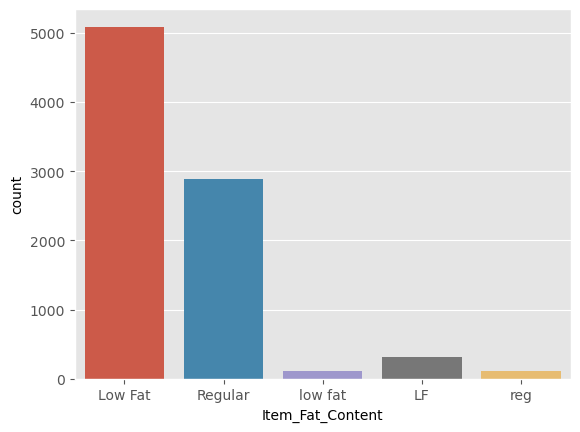

In [17]:
sns.countplot(x='Item_Fat_Content', data = categorical_data)

In [25]:
categorical_data.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat','reg':'Regular'}}, inplace=True)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

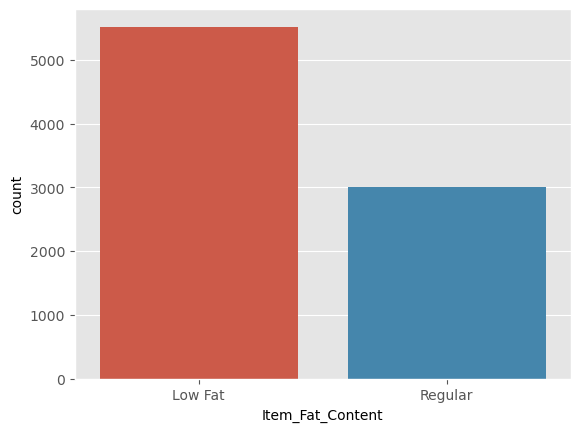

In [26]:
sns.countplot(x='Item_Fat_Content', data = categorical_data)

<Axes: xlabel='count', ylabel='Outlet_Identifier'>

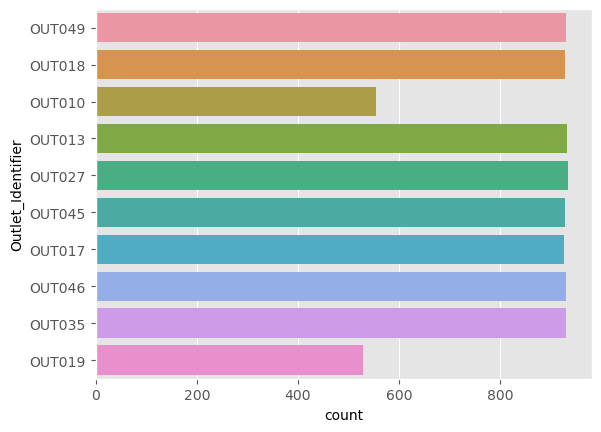

In [21]:
sns.countplot(y='Outlet_Identifier', data = categorical_data)

In [22]:
categorical_data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

<Axes: xlabel='count', ylabel='Item_Type'>

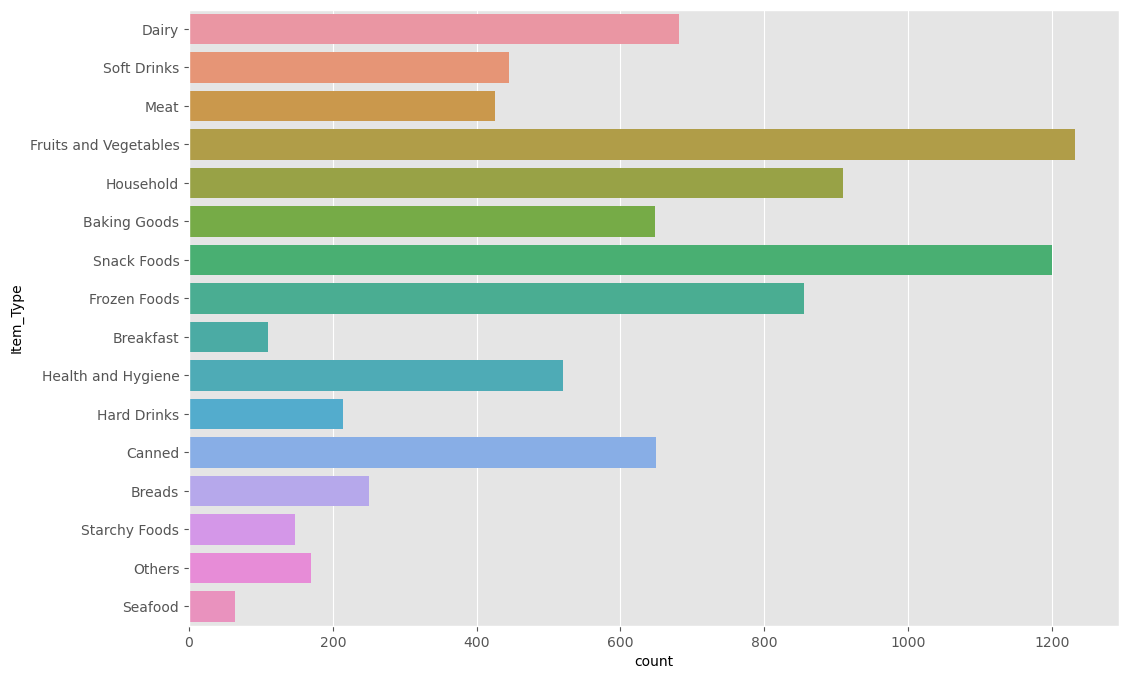

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(y='Item_Type', data= categorical_data)

<Axes: xlabel='count', ylabel='Outlet_Location_Type'>

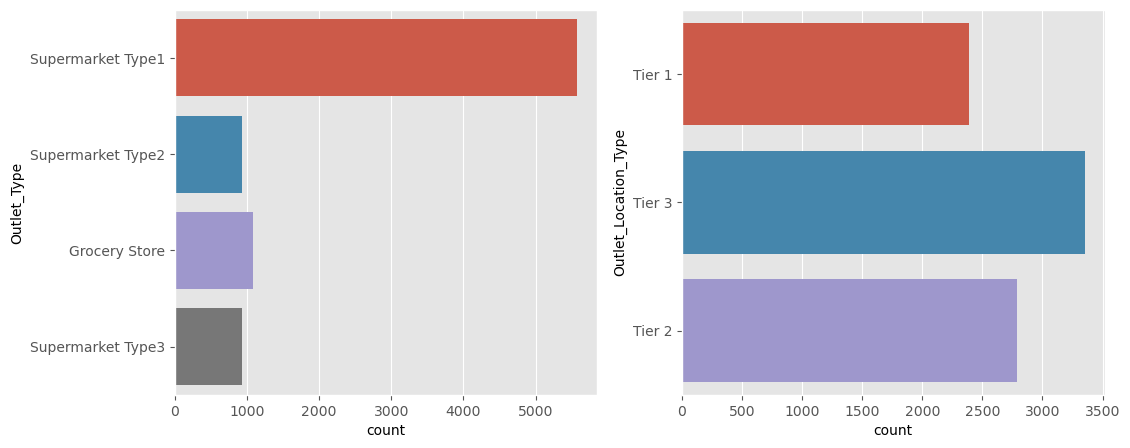

In [24]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.countplot(y='Outlet_Type', data = categorical_data, ax= axes[0])
sns.countplot(y='Outlet_Location_Type', data = categorical_data, ax= axes[1])

In [27]:
numerical_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Axes: >

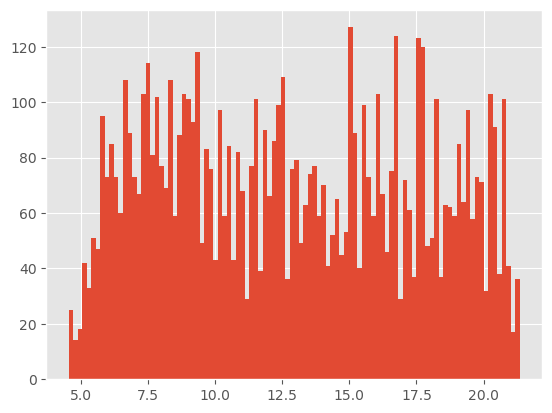

In [28]:
numerical_data['Item_Weight'].hist(bins=100)

<Axes: >

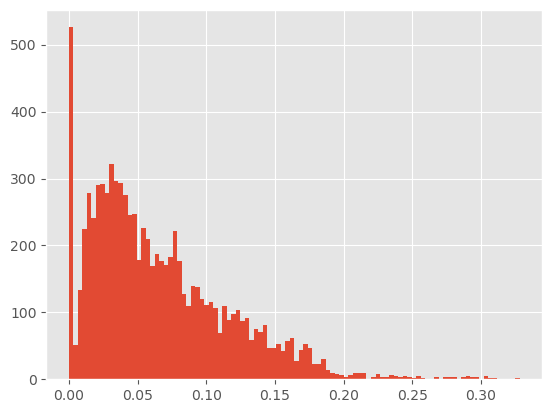

In [29]:
numerical_data['Item_Visibility'].hist(bins=100)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

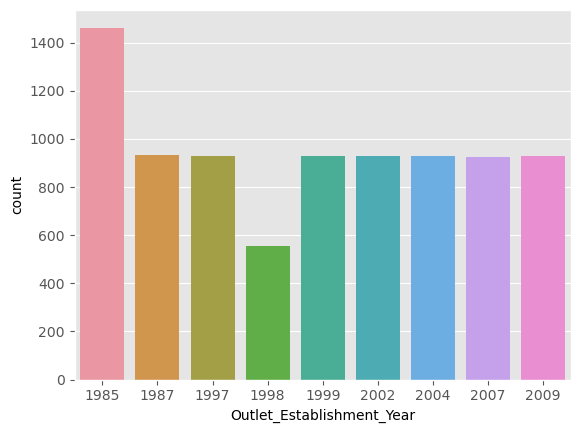

In [30]:
sns.countplot(x='Outlet_Establishment_Year', data=numerical_data)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

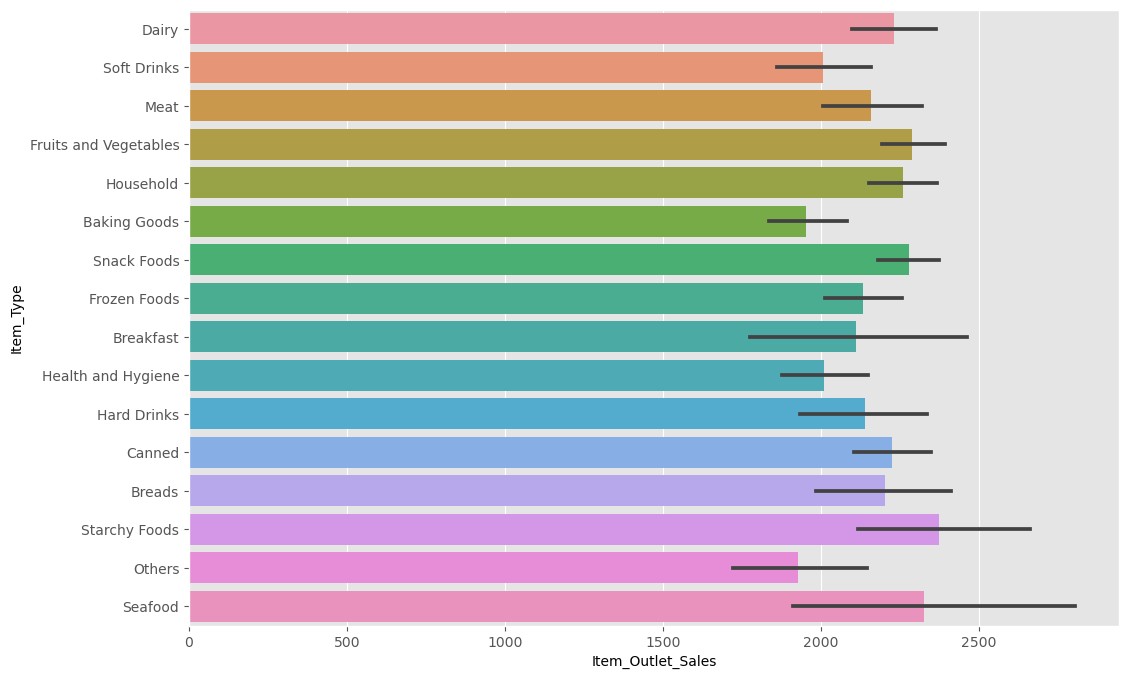

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=df)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

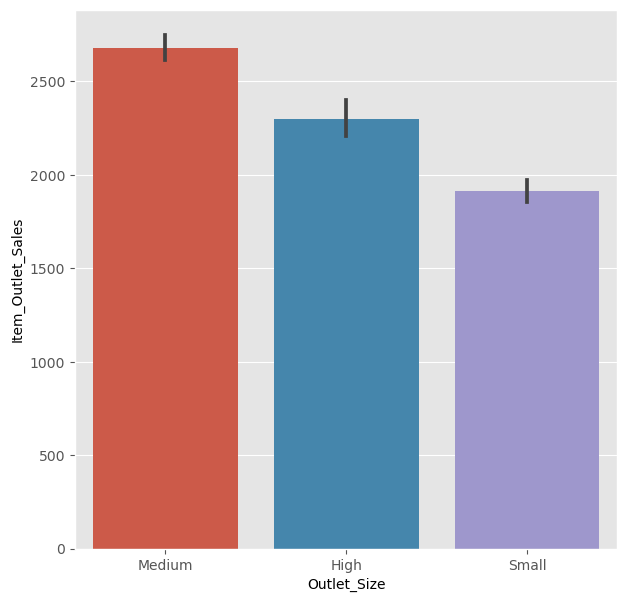

In [32]:
plt.figure(figsize=(7,7))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data= df)

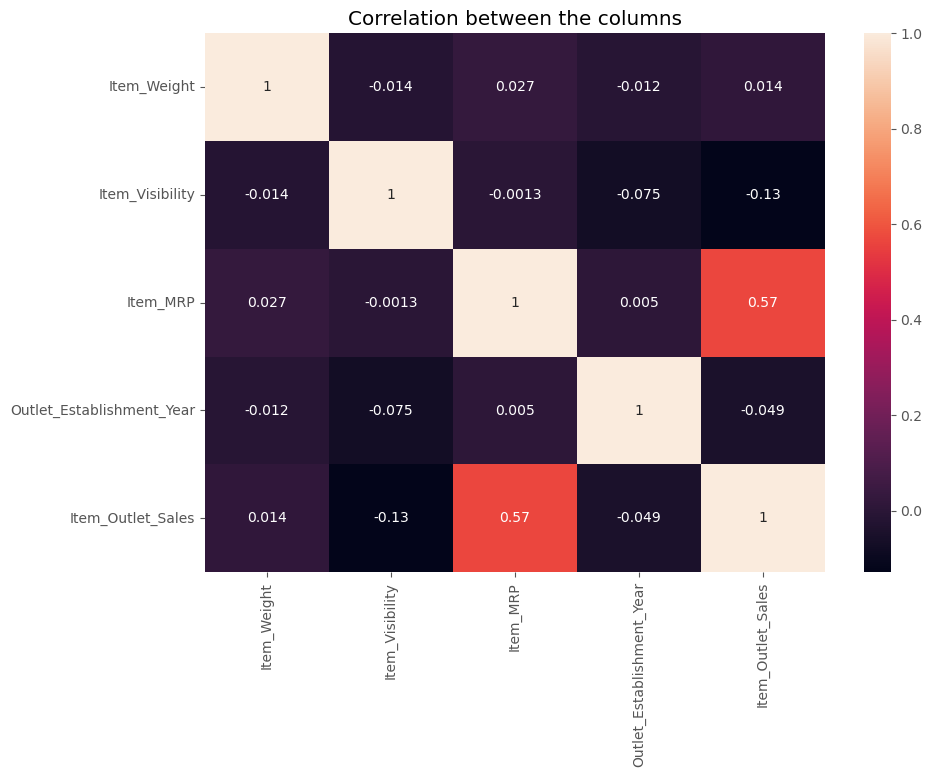

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()